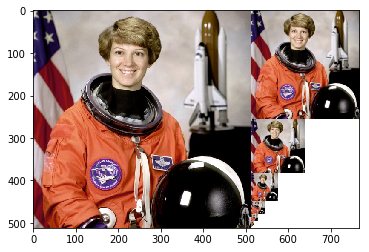

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import data,transform
%matplotlib inline

image = data.astronaut()  #载入宇航员图片
rows, cols, dim = image.shape  #获取图片的行数，列数和通道数
pyramid = tuple(transform.pyramid_gaussian(image, downscale=2))  

#产生高斯金字塔图像
#共生成了log(512)=9幅金字塔图像，加上原始图像共10幅，pyramid[0]-pyramid[1]

composite_image = np.ones((rows, int(cols + cols / 2), 3), dtype=np.double)  #生成背景

composite_image[:rows, :cols, :] = pyramid[0]  #融合原始图像

i_row = 0
for p in pyramid[1:]:
    n_rows, n_cols = p.shape[:2]
    composite_image[i_row:i_row + n_rows, cols:cols + n_cols] = p  #循环融合9幅金字塔图像
    i_row += n_rows

plt.imshow(composite_image)
plt.show()